In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

#ML tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

print('Loading...')
print('100%...necessary libraries imported')

Loading...
100%...necessary libraries imported


In [8]:
data = pd.read_excel('improvised_data_train.xlsx')
data

,Gender,Age,Income,Region,PartyID,Ideology,Vote Intention,Attention to election
0,Male,45-65,Under $50K,West,Democratic,Liberal,Trump,A lot
1,Male,65+,$50-100K,West,Independent,Modern Liberal,Trump,A lot
2,Male,30-44,Under $50K,Midwest,Democratic,Conservative,Trump,A lot
3,Male,30-44,Under $50K,Northeast,Democratic,Liberal,Biden,A lot
4,Male,45-65,Under $50K,Midwest,Republican,Conservative,Trump,A lot
...,...,...,...,...,...,...,...,...
1194,Female,18-29,Under $50K,South,Democratic,Liberal,Trump,A lot
1195,Female,45-65,$50-100K,South,Democratic,Modern Liberal,Biden,A lot
1196,Female,65+,Under $50K,Midwest,Democratic,Liberal,Trump,Some
1197,Female,45-65,$50-100K,South,Independent,Conservative,Biden,Some


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1199 non-null   object
 1   Age                    1199 non-null   object
 2   Income                 1199 non-null   object
 3   Region                 1199 non-null   object
 4   PartyID                1199 non-null   object
 5   Ideology               1199 non-null   object
 6   Vote Intention         1199 non-null   object
 7   Attention to election  1199 non-null   object
dtypes: object(8)
memory usage: 75.1+ KB


In [10]:
data.columns

Index(['Gender', 'Age', 'Income', 'Region', 'PartyID', 'Ideology',
       'Vote Intention', 'Attention to election'],
      dtype='object')

In [11]:
data.Gender.value_counts()

Male      683
Female    516
Name: Gender, dtype: int64

In [12]:
data.Age.value_counts()

45-65    506
65+      312
30-44    242
18-29    139
Name: Age, dtype: int64

In [13]:
data.Income.value_counts()

Under $50K       510
$50-100K         414
$100K or more    275
Name: Income, dtype: int64

In [14]:
data.Region.value_counts()

South        469
West         312
Midwest      214
Northeast    204
Name: Region, dtype: int64

In [16]:
data.PartyID.value_counts()

Democratic     434
Independent    431
Republican     334
Name: PartyID, dtype: int64

In [17]:
data.Ideology.value_counts()

Conservative      444
Liberal           383
Modern Liberal    372
Name: Ideology, dtype: int64

In [18]:
data['Attention to election'].value_counts()

A lot            1018
Some              119
Only a little      62
Name: Attention to election, dtype: int64

In [19]:
data.columns = ['Gender', 'Age', 'Income', 'Region', 'PartyID', 'Ideology', 'Target', 'Attention to election']

In [20]:
data

,Gender,Age,Income,Region,PartyID,Ideology,Target,Attention to election
0,Male,45-65,Under $50K,West,Democratic,Liberal,Trump,A lot
1,Male,65+,$50-100K,West,Independent,Modern Liberal,Trump,A lot
2,Male,30-44,Under $50K,Midwest,Democratic,Conservative,Trump,A lot
3,Male,30-44,Under $50K,Northeast,Democratic,Liberal,Biden,A lot
4,Male,45-65,Under $50K,Midwest,Republican,Conservative,Trump,A lot
...,...,...,...,...,...,...,...,...
1194,Female,18-29,Under $50K,South,Democratic,Liberal,Trump,A lot
1195,Female,45-65,$50-100K,South,Democratic,Modern Liberal,Biden,A lot
1196,Female,65+,Under $50K,Midwest,Democratic,Liberal,Trump,Some
1197,Female,45-65,$50-100K,South,Independent,Conservative,Biden,Some


# Citizens who paid attention to election


In [21]:
data.groupby(['Age', 'Gender']).count()['Attention to election']

Age    Gender
18-29  Female     67
       Male       72
30-44  Female    107
       Male      135
45-65  Female    211
       Male      295
65+    Female    131
       Male      181
Name: Attention to election, dtype: int64

Text(0.5, 1.0, 'Attention to election')

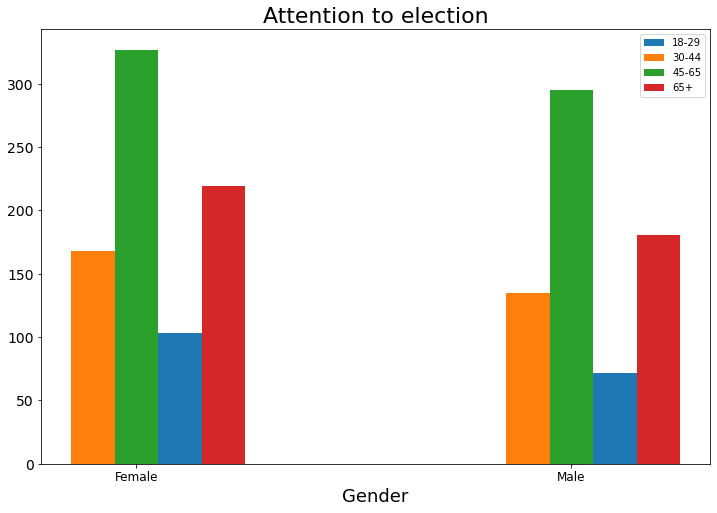

In [22]:
plt.figure(figsize=(12,8))
x_gender = ['Female', 'Male']
x_indexes = np.arange(len(x_gender))
width = 0.1 

y_18 = [103, 72]
plt.bar(x_indexes + 0.1, y_18, width = width ,label = '18-29')

y_30 = [168, 135]
plt.bar(x_indexes - 0.1, y_30, width = width, label = '30-44')

y_45 = [327, 295]
plt.bar(x_indexes, y_45, width = width, label = '45-65')

y_65plus = [219, 181]
plt.bar(x_indexes + 0.2, y_65plus, width = width, label = '65+')

plt.legend()

plt.xlabel('Gender', fontsize=18)
plt.xticks(ticks = x_indexes, labels = x_gender, fontsize = 12)
plt.yticks(fontsize = 14)
plt.title('Attention to election', fontsize=22)

# PartyID count by Gender

In [23]:
data.groupby(['PartyID', 'Gender']).count()['Ideology']

PartyID      Gender
Democratic   Female    192
             Male      242
Independent  Female    191
             Male      240
Republican   Female    133
             Male      201
Name: Ideology, dtype: int64

Text(0.5, 1.0, 'PartyID count by Gender')

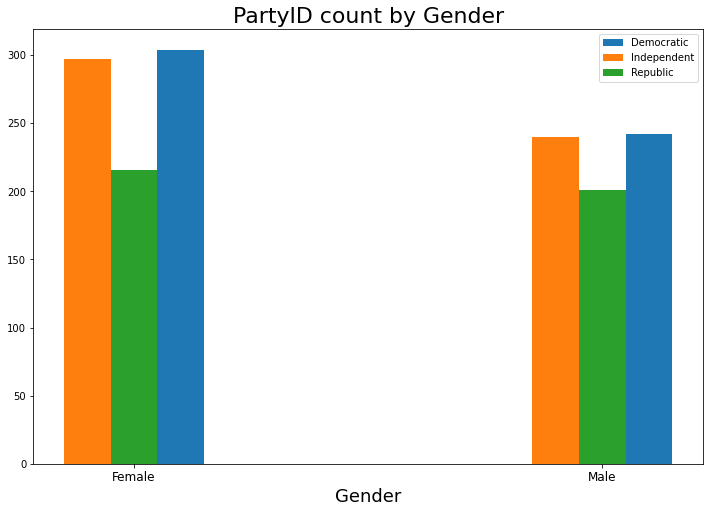

In [24]:
plt.figure(figsize=(12,8))
x_gender = ['Female', 'Male']
x_indexes = np.arange(len(x_gender))
width = 0.1 

y_demo = [304, 242]
plt.bar(x_indexes + 0.1, y_demo, width = width ,label = 'Democratic')

y_ind = [297, 240]
plt.bar(x_indexes - 0.1, y_ind, width = width, label = 'Independent')

y_rep = [216, 201]
plt.bar(x_indexes, y_rep, width = width, label = 'Republic')


plt.legend()

plt.xlabel('Gender', fontsize=18)
plt.xticks(ticks = x_indexes, labels = x_gender, fontsize = 12)
plt.title('PartyID count by Gender', fontsize=22)